# Assignment Title : Customer Churn Prediction

## Importing Modules

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier  # You can replace this with the specific model you choose
from imblearn.over_sampling import SMOTE  # If you're dealing with class imbalance
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning
import joblib  # For saving and loading models

## 1.Data Preprocessing

In [4]:
df = pd.read_excel("customer_churn_large_dataset.xlsx")
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [6]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64


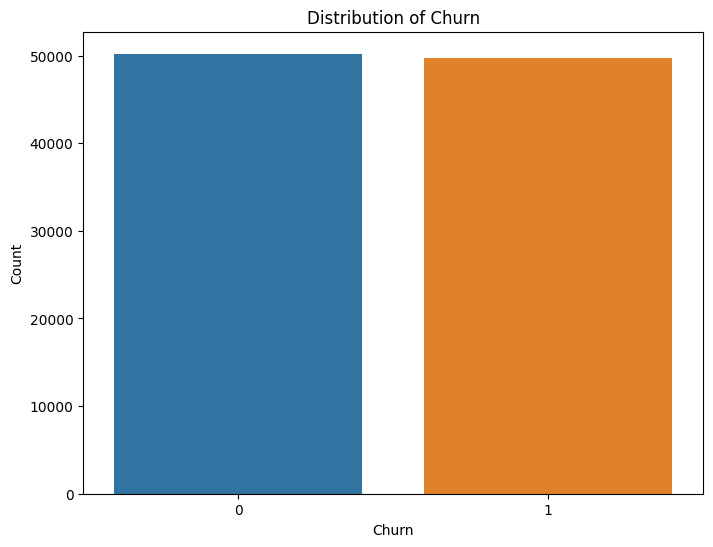

Class Distribution:
Churn
0    0.50221
1    0.49779
Name: proportion, dtype: float64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Churn')
plt.title("Distribution of Churn")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

# Calculate the class distribution
class_distribution = df['Churn'].value_counts(normalize=True)
print("Class Distribution:")
print(class_distribution)

In [8]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming df is your DataFrame
# Separate the target variable (Churn) from the features
X = df.drop(columns=['CustomerID', 'Name', 'Churn'])
y = df['Churn']

# Define numerical and categorical features
numerical_features = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']
categorical_features = ['Gender', 'Location']

# Create transformers for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

# Use ColumnTransformer to apply transformers to respective feature groups
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Combine preprocessing with classifier in a single pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Display the model's performance metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

Accuracy: 0.49
Precision: 0.49
Recall: 0.47
F1 Score: 0.48
ROC AUC: 0.49


In [10]:
# Create a DataFrame with the data for prediction
new_data = pd.DataFrame({
    'Age': [28],
    'Gender': ['Male'],
    'Location': ['New York'],
    'Subscription_Length_Months': [6],
    'Monthly_Bill': [100],
    'Total_Usage_GB': [300]
})

# Make predictions on the new data
predictions = clf.predict(new_data)

# Display the predictions
print(predictions)

[0]


In [11]:
import pickle

# Save the trained model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(clf, file)

## 2.Feature Engineering

In [12]:
# Feature engineering
# 1. Age Group
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 50, float('inf')], labels=['Young', 'Adult', 'Senior'])

# 2. Subscription Length Group
df['Subscription_Length_Group'] = pd.cut(df['Subscription_Length_Months'], bins=[0, 6, 12, float('inf')], labels=['Short-term', 'Medium-term', 'Long-term'])

# 3. Monthly Bill per GB
df['Monthly_Bill_Per_GB'] = df['Monthly_Bill'] / df['Total_Usage_GB']

# 4. Usage Rate
df['Usage_Rate'] = df['Total_Usage_GB'] / df['Subscription_Length_Months']

# Display the updated DataFrame with engineered features
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Age_Group,Subscription_Length_Group,Monthly_Bill_Per_GB,Usage_Rate
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0,Senior,Long-term,0.310847,13.882353
1,2,Customer_2,62,Female,New York,1,48.76,172,0,Senior,Short-term,0.283488,172.000000
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0,Young,Short-term,0.185804,92.000000
3,4,Customer_4,36,Female,Miami,3,97.94,297,1,Adult,Short-term,0.329764,99.000000
4,5,Customer_5,46,Female,Miami,19,58.14,266,0,Adult,Long-term,0.218571,14.000000


In [13]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Age_Group,Subscription_Length_Group,Monthly_Bill_Per_GB,Usage_Rate
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0,Senior,Long-term,0.310847,13.882353
1,2,Customer_2,62,Female,New York,1,48.76,172,0,Senior,Short-term,0.283488,172.000000
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0,Young,Short-term,0.185804,92.000000
3,4,Customer_4,36,Female,Miami,3,97.94,297,1,Adult,Short-term,0.329764,99.000000
4,5,Customer_5,46,Female,Miami,19,58.14,266,0,Adult,Long-term,0.218571,14.000000


## Data Transformation and encoding

In [14]:
from sklearn.preprocessing import StandardScaler

# Separate the target variable (Churn) from the features
X = df.drop(columns=['CustomerID', 'Name', 'Churn'])
y = df['Churn']

# Perform standardization on numerical features
numerical_features = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Monthly_Bill_Per_GB', 'Usage_Rate']
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Perform one-hot encoding on categorical features
categorical_features = ['Gender', 'Age_Group', 'Subscription_Length_Group', 'Location']
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Display the updated DataFrame with standardized and one-hot encoded features
X_encoded.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Monthly_Bill_Per_GB,Usage_Rate,Gender_Male,Age_Group_Adult,Age_Group_Senior,Subscription_Length_Group_Medium-term,Subscription_Length_Group_Long-term,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,1.241670,0.651115,0.410606,-0.294289,-0.087005,-0.447926,True,False,True,False,True,False,True,False,False
1,1.176226,-1.658879,-0.805374,-0.784852,-0.186072,1.955583,False,False,True,False,False,False,False,False,True
2,-1.310651,-1.081380,1.009204,1.422681,-0.539783,0.739522,False,False,False,False,False,False,True,False,False
3,-0.525321,-1.370129,1.625597,0.173279,-0.018508,0.845928,False,True,False,False,False,False,False,True,False
4,0.129120,0.939864,-0.341720,-0.064338,-0.421134,-0.446138,False,True,False,False,True,False,False,True,False


In [15]:
X_encoded.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Monthly_Bill_Per_GB,Usage_Rate,Gender_Male,Age_Group_Adult,Age_Group_Senior,Subscription_Length_Group_Medium-term,Subscription_Length_Group_Long-term,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,1.241670,0.651115,0.410606,-0.294289,-0.087005,-0.447926,True,False,True,False,True,False,True,False,False
1,1.176226,-1.658879,-0.805374,-0.784852,-0.186072,1.955583,False,False,True,False,False,False,False,False,True
2,-1.310651,-1.081380,1.009204,1.422681,-0.539783,0.739522,False,False,False,False,False,False,True,False,False
3,-0.525321,-1.370129,1.625597,0.173279,-0.018508,0.845928,False,True,False,False,False,False,False,True,False
4,0.129120,0.939864,-0.341720,-0.064338,-0.421134,-0.446138,False,True,False,False,True,False,False,True,False


## Model Building

In [16]:
# Split the data into training and testing sets (e.g., 80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (80000, 15)
X_test shape: (20000, 15)
y_train shape: (80000,)
y_test shape: (20000,)


In [17]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


# Define a dictionary of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'k-NN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")
    print("-" * 40)

# Hyperparameter tuning (GridSearchCV) can be performed for the best-performing model.


Classifier: Logistic Regression
Accuracy: 0.50
Precision: 0.50
Recall: 0.40
F1 Score: 0.45
ROC AUC: 0.50
----------------------------------------
Classifier: Random Forest
Accuracy: 0.50
Precision: 0.49
Recall: 0.47
F1 Score: 0.48
ROC AUC: 0.50
----------------------------------------
Classifier: Gradient Boosting
Accuracy: 0.50
Precision: 0.50
Recall: 0.39
F1 Score: 0.44
ROC AUC: 0.50
----------------------------------------
Classifier: SVM
Accuracy: 0.50
Precision: 0.50
Recall: 0.42
F1 Score: 0.46
ROC AUC: 0.50
----------------------------------------
Classifier: Naive Bayes
Accuracy: 0.51
Precision: 0.50
Recall: 0.45
F1 Score: 0.48
ROC AUC: 0.51
----------------------------------------
Classifier: k-NN
Accuracy: 0.50
Precision: 0.49
Recall: 0.49
F1 Score: 0.49
ROC AUC: 0.50
----------------------------------------
Classifier: Decision Tree
Accuracy: 0.50
Precision: 0.50
Recall: 0.50
F1 Score: 0.50
ROC AUC: 0.50
----------------------------------------


## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters for each model
param_grid = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'max_depth': [3, 4, 5]},
    'SVM': {'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']},
    # Add hyperparameters for other models
}

# Create a dictionary to store the best models and their performance
best_models = {}

# Perform hyperparameter tuning for each model
for name, classifier in classifiers.items():
    if name in param_grid:
        grid_search = GridSearchCV(classifier, param_grid[name], scoring='precision', cv=5)
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_
        print(f"Best hyperparameters for {name}: {grid_search.best_params_}")
    else:
        # Models without specified hyperparameters
        classifier.fit(X_train, y_train)
        best_models[name] = classifier

# Evaluate the best models on the test set using different metrics
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Precision: {precision:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")
    print("-" * 40)


In [19]:
# Load the best-performing model (e.g., Random Forest with tuned hyperparameters)
from sklearn.ensemble import RandomForestClassifier

best_model = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=42)

# Fit the model to the training data
best_model.fit(X_train, y_train)

# Load and preprocess the test data (X_test and y_test)
# Ensure that the test data is processed in the same way as the training data

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Model Performance on Test Data:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")


Model Performance on Test Data:
Accuracy: 0.50
Precision: 0.50
Recall: 0.49
F1 Score: 0.49
ROC AUC: 0.50


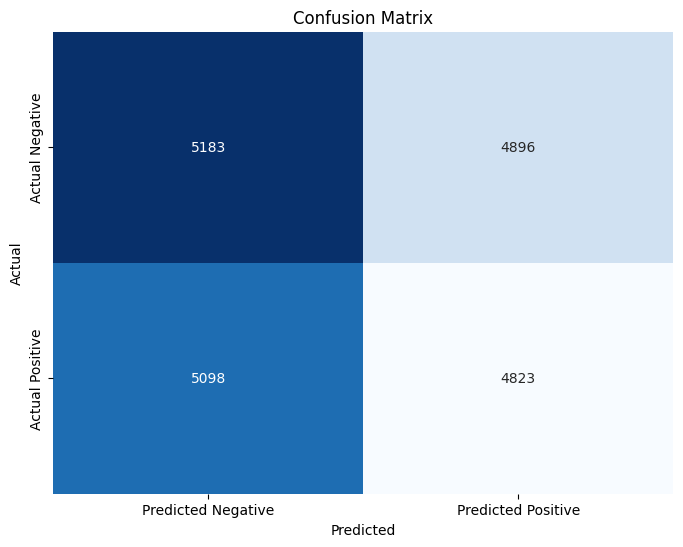

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.51      0.51     10079
           1       0.50      0.49      0.49      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



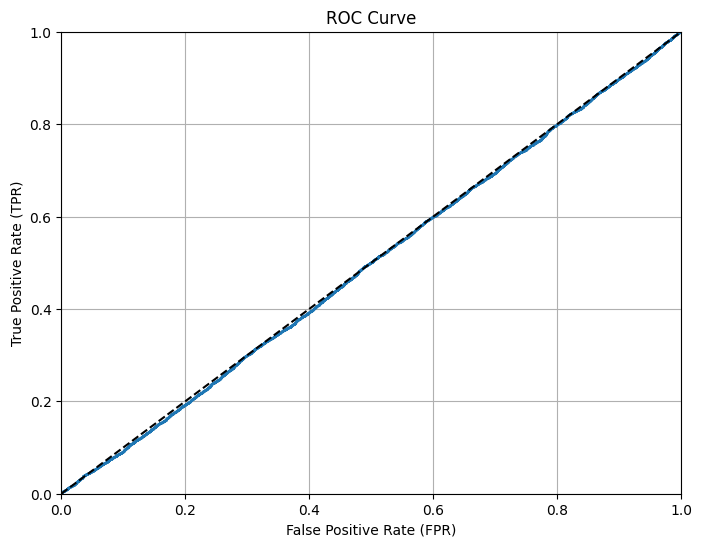

AUC Score: 0.50


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generate a classification report
class_report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(class_report)

# Plot ROC Curve
from sklearn.metrics import roc_curve

y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.grid()
plt.show()

# Calculate the Area Under the ROC Curve (AUC)
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {roc_auc:.2f}")